In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from sklearn.datasets import fetch_lfw_people

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=70)

In [ ]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [ ]:
len(faces.target_names)

7

In [ ]:
faces.target


array([5, 6, 3, ..., 5, 3, 5])

In [ ]:
np.unique(faces.target)

array([0, 1, 2, 3, 4, 5, 6])

Hugo Chavez


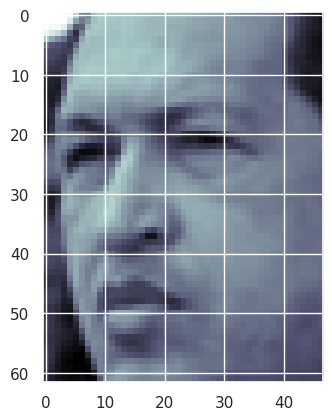

In [ ]:
plt.imshow(faces.images[0], cmap = 'bone')
print(faces.target_names[faces.target[0]])

In [ ]:
faces.images[0].shape

(62, 47)

In [ ]:
62*47

2914

In [ ]:
X = faces.data

In [ ]:
X.shape

(1288, 2914)

In [ ]:
y = faces.target

In [ ]:
y.shape

(1288,)

In [ ]:
y[100]

3

In [ ]:
faces.target_names[y[100]]

'George W Bush'

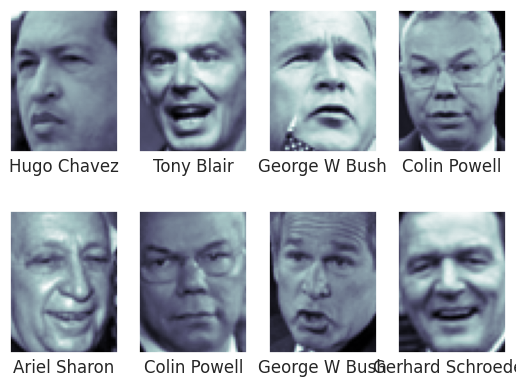

In [ ]:
fig, ax = plt.subplots(2, 4)
for idx, axidx in enumerate(ax.flat):
    axidx.imshow(faces.images[idx], cmap = 'bone')
    axidx.set(xticks = [], yticks = [],
             xlabel = faces.target_names[faces.target[idx]])

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, wei

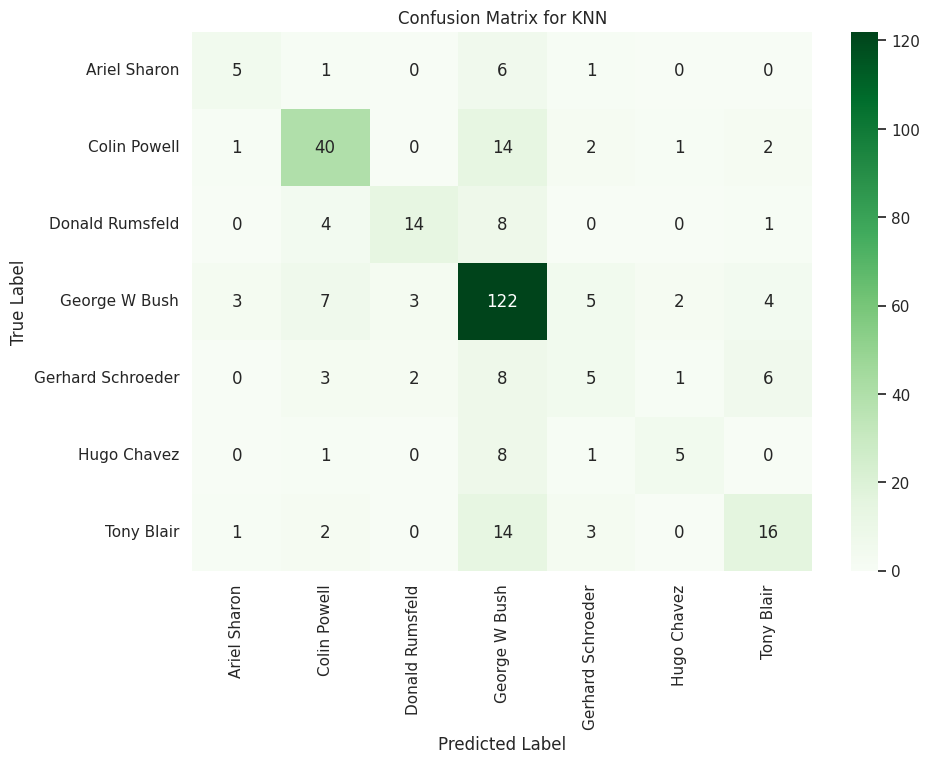


Classification Report for KNN:
                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.38      0.43        13
     Colin Powell       0.69      0.67      0.68        60
  Donald Rumsfeld       0.74      0.52      0.61        27
    George W Bush       0.68      0.84      0.75       146
Gerhard Schroeder       0.29      0.20      0.24        25
      Hugo Chavez       0.56      0.33      0.42        15
       Tony Blair       0.55      0.44      0.49        36

         accuracy                           0.64       322
        macro avg       0.57      0.48      0.52       322
     weighted avg       0.63      0.64      0.63       322


Nearest Neighbor (Manual Calculation):
True label: 3, Predicted label: 3


In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.data
y = lfw_people.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, refit=True, verbose=2)

grid_knn.fit(Xtrain_scaled, ytrain)

print("Best Parameters for KNN: ", grid_knn.best_params_)

y_pred_knn = grid_knn.predict(Xtest_scaled)

acc_knn = accuracy_score(ytest, y_pred_knn) * 100
print(f"KNN Accuracy: {acc_knn:f}%")

cm_knn = confusion_matrix(ytest, y_pred_knn)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", xticklabels=lfw_people.target_names, yticklabels=lfw_people.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN")
plt.show()

print("\nClassification Report for KNN:")
print(classification_report(ytest, y_pred_knn, target_names=lfw_people.target_names))

idx = np.random.randint(ytest.size)
xt = Xtest[idx]
nnidx = np.argmin(((Xtrain - xt) ** 2).sum(axis=1))
y_pred_nn = ytrain[nnidx]
y_true_nn = ytest[idx]
print("\nNearest Neighbor (Manual Calculation):")
print(f"True label: {y_true_nn}, Predicted label: {y_pred_nn}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ......................C=0.1, gamma=0.01

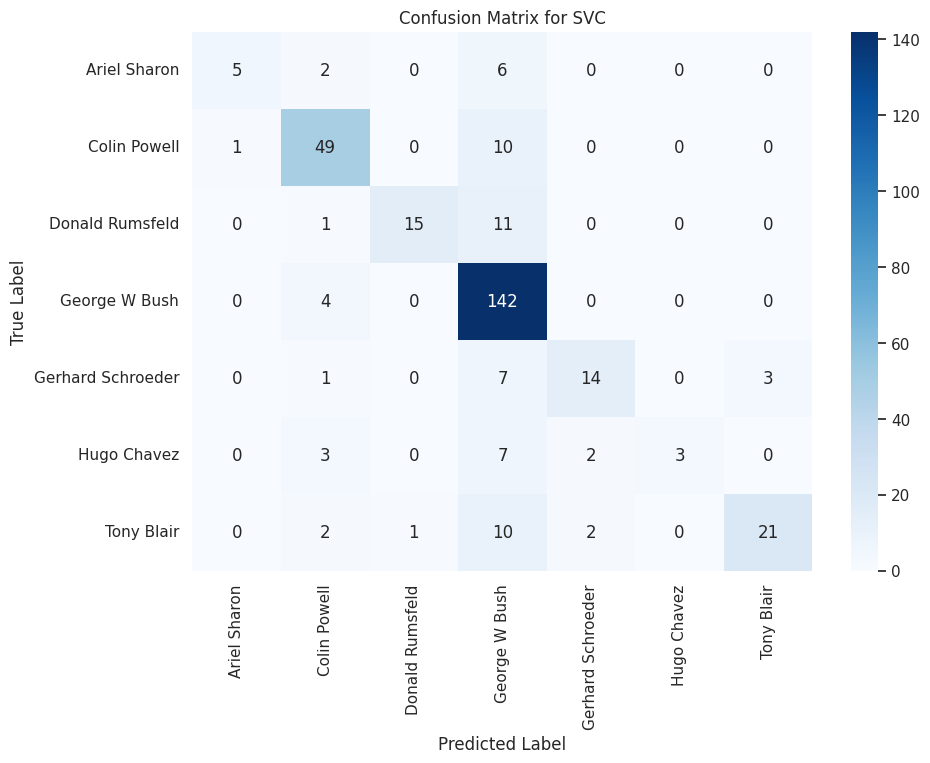


Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.83      0.38      0.53        13
     Colin Powell       0.79      0.82      0.80        60
  Donald Rumsfeld       0.94      0.56      0.70        27
    George W Bush       0.74      0.97      0.84       146
Gerhard Schroeder       0.78      0.56      0.65        25
      Hugo Chavez       1.00      0.20      0.33        15
       Tony Blair       0.88      0.58      0.70        36

         accuracy                           0.77       322
        macro avg       0.85      0.58      0.65       322
     weighted avg       0.80      0.77      0.75       322



In [ ]:
# from sklearn.svm import SVC
# m = SVC(gamma='auto', kernel = 'rbf')
# m.fit(Xtrain, ytrain)
# y_pred = m.predict(Xtest)
# acc = 100*((y_pred == ytest).sum()/ytest.size)
# print("Acc is ", acc, "%")

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.data
y = lfw_people.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

grid.fit(Xtrain_scaled, ytrain)

print("Best Parameters: ", grid.best_params_)

y_pred = grid.predict(Xtest_scaled)

acc = accuracy_score(ytest, y_pred) * 100
print(f"Improved Accuracy: {acc:f}%")

cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=lfw_people.target_names, yticklabels=lfw_people.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVC")
plt.show()

print("\nClassification Report:")
print(classification_report(ytest, y_pred, target_names=lfw_people.target_names))


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [ ]:
mPca = PCA(n_components = 300)
mSvm = SVC(gamma='auto')
m = make_pipeline(mPca, mSvm)
m.fit(Xtrain, ytrain)
y_pred = m.predict(Xtest)
acc = 100*((y_pred == ytest).sum()/ytest.size)
print("Acc is ", acc, "%")

Acc is  61.80124223602485 %


Random Forest Accuracy: 65.217391%


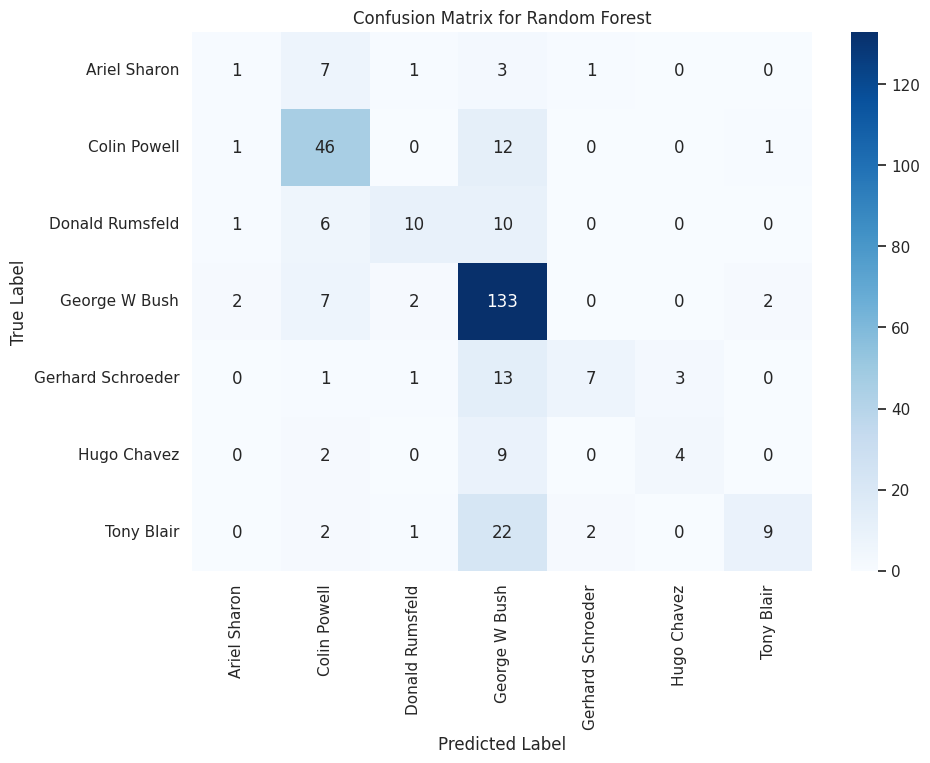


Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.20      0.08      0.11        13
     Colin Powell       0.65      0.77      0.70        60
  Donald Rumsfeld       0.67      0.37      0.48        27
    George W Bush       0.66      0.91      0.76       146
Gerhard Schroeder       0.70      0.28      0.40        25
      Hugo Chavez       0.57      0.27      0.36        15
       Tony Blair       0.75      0.25      0.38        36

         accuracy                           0.65       322
        macro avg       0.60      0.42      0.46       322
     weighted avg       0.65      0.65      0.61       322



In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.data
y = lfw_people.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

mR = RandomForestClassifier(n_estimators=30, random_state=42)
mR.fit(Xtrain, ytrain)

y_pred = mR.predict(Xtest)

acc = accuracy_score(ytest, y_pred) * 100
print(f"Random Forest Accuracy: {acc:f}%")

cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=lfw_people.target_names, yticklabels=lfw_people.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest")
plt.show()

print("\nClassification Report:")
print(classification_report(ytest, y_pred, target_names=lfw_people.target_names))

Decision Tree Accuracy: 45.341615%


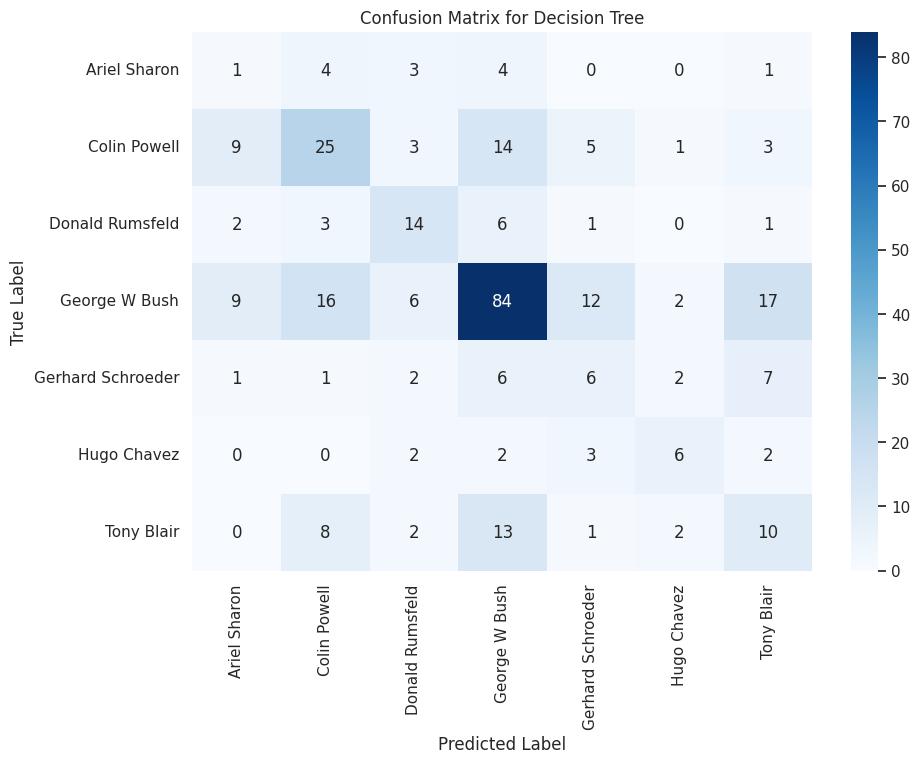


Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.05      0.08      0.06        13
     Colin Powell       0.44      0.42      0.43        60
  Donald Rumsfeld       0.44      0.52      0.47        27
    George W Bush       0.65      0.58      0.61       146
Gerhard Schroeder       0.21      0.24      0.23        25
      Hugo Chavez       0.46      0.40      0.43        15
       Tony Blair       0.24      0.28      0.26        36

         accuracy                           0.45       322
        macro avg       0.36      0.36      0.35       322
     weighted avg       0.48      0.45      0.47       322



In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.data
y = lfw_people.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(Xtrain, ytrain)

y_pred = model.predict(Xtest)

acc = accuracy_score(ytest, y_pred) * 100
print(f"Decision Tree Accuracy: {acc:f}%")

cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=lfw_people.target_names, yticklabels=lfw_people.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

print("\nClassification Report:")
print(classification_report(ytest, y_pred, target_names=lfw_people.target_names))


Logistic Regression Accuracy: 83.850932%


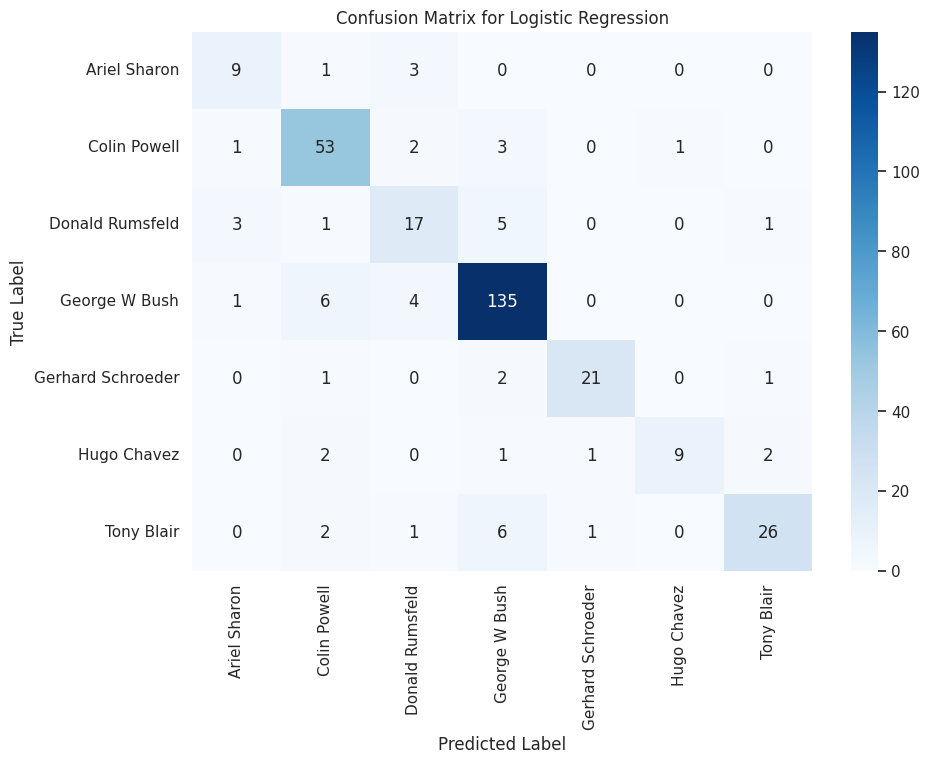


Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.64      0.69      0.67        13
     Colin Powell       0.80      0.88      0.84        60
  Donald Rumsfeld       0.63      0.63      0.63        27
    George W Bush       0.89      0.92      0.91       146
Gerhard Schroeder       0.91      0.84      0.88        25
      Hugo Chavez       0.90      0.60      0.72        15
       Tony Blair       0.87      0.72      0.79        36

         accuracy                           0.84       322
        macro avg       0.81      0.76      0.78       322
     weighted avg       0.84      0.84      0.84       322



In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.data
y = lfw_people.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(Xtrain, ytrain)

y_pred_logistic = model_logistic.predict(Xtest)

acc_logistic = accuracy_score(ytest, y_pred_logistic) * 100
print(f"Logistic Regression Accuracy: {acc_logistic:f}%")

cm = confusion_matrix(ytest, y_pred_logistic)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=lfw_people.target_names, yticklabels=lfw_people.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

print("\nClassification Report:")
print(classification_report(ytest, y_pred_logistic, target_names=lfw_people.target_names))

Boosting Model Test Accuracy: 70.186335%


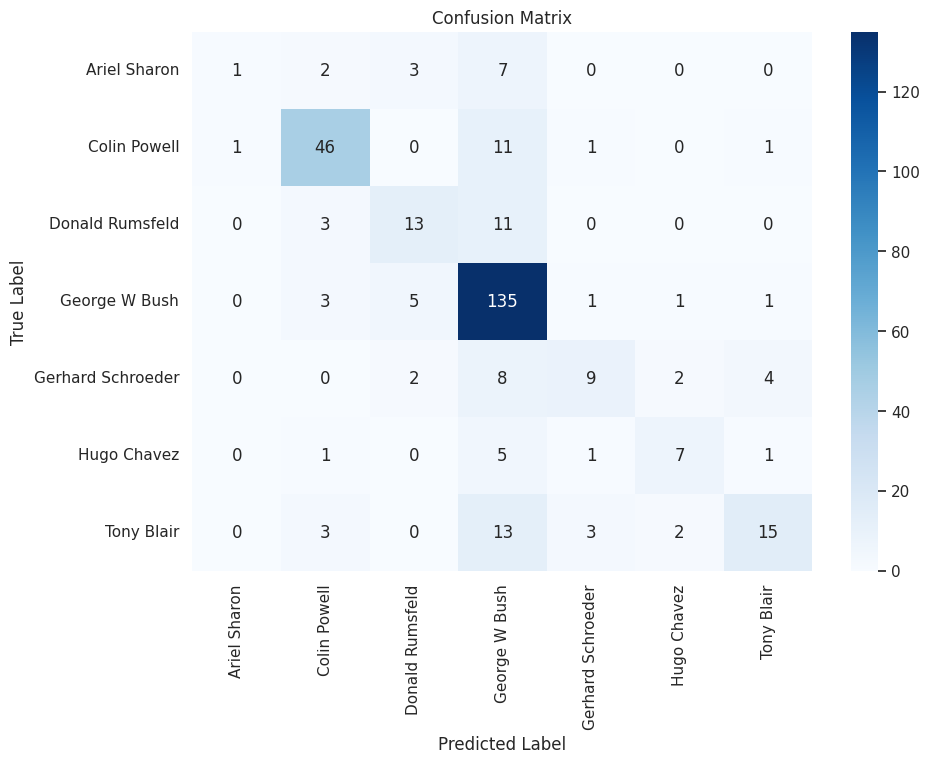

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.08      0.13        13
           1       0.79      0.77      0.78        60
           2       0.57      0.48      0.52        27
           3       0.71      0.92      0.80       146
           4       0.60      0.36      0.45        25
           5       0.58      0.47      0.52        15
           6       0.68      0.42      0.52        36

    accuracy                           0.70       322
   macro avg       0.63      0.50      0.53       322
weighted avg       0.69      0.70      0.68       322



In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target

X = X / 255.0

le = LabelEncoder()
y = le.fit_transform(y)

n_components = 100
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

boosting_model.fit(X_train, y_train)

y_pred = boosting_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Boosting Model Test Accuracy: {accuracy * 100:f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=lfw_people.target_names, yticklabels=lfw_people.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str)))


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 142MB/s]


Epoch [1/15], Loss: 1.8081, Accuracy: 32.61%
Epoch [2/15], Loss: 1.7232, Accuracy: 39.75%
Epoch [3/15], Loss: 1.7174, Accuracy: 39.75%
Epoch [4/15], Loss: 1.7089, Accuracy: 39.75%
Epoch [5/15], Loss: 1.7095, Accuracy: 39.75%
Epoch [6/15], Loss: 1.7177, Accuracy: 39.75%
Epoch [7/15], Loss: 1.7246, Accuracy: 39.75%
Epoch [8/15], Loss: 1.7159, Accuracy: 39.75%
Epoch [9/15], Loss: 1.7241, Accuracy: 39.75%
Epoch [10/15], Loss: 1.7088, Accuracy: 39.75%
Epoch [11/15], Loss: 1.7024, Accuracy: 39.75%
Epoch [12/15], Loss: 1.7077, Accuracy: 39.75%
Epoch [13/15], Loss: 1.7109, Accuracy: 39.75%
Epoch [14/15], Loss: 1.7067, Accuracy: 39.75%
Epoch [15/15], Loss: 1.7122, Accuracy: 39.75%
Test Accuracy: 45.341615%


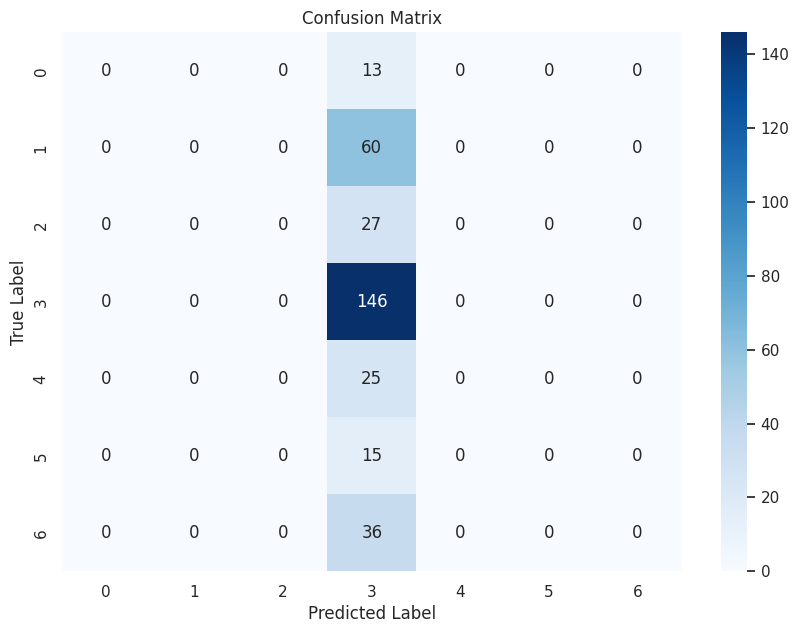

In [ ]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models, transforms
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target

X = X / 255.0
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1, 50, 37)

resize_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

X_tensor_resized = torch.stack([resize_transform(img) for img in X_tensor])

le = LabelEncoder()
y = le.fit_transform(y)
y_tensor = torch.tensor(y, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X_tensor_resized, y_tensor, test_size=0.25, random_state=42)
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)
model.features[0] = nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2)

for param in model.features[6:].parameters():
    param.requires_grad = True

model.classifier[6] = nn.Linear(in_features=4096, out_features=len(set(y)))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.00001)

num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct_preds / total_preds
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

model.eval()
test_correct_preds = 0
test_total_preds = 0
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_correct_preds += (predicted == labels).sum().item()
        test_total_preds += labels.size(0)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

test_acc = 100 * test_correct_preds / test_total_preds
print(f"Test Accuracy: {test_acc:f}%")

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


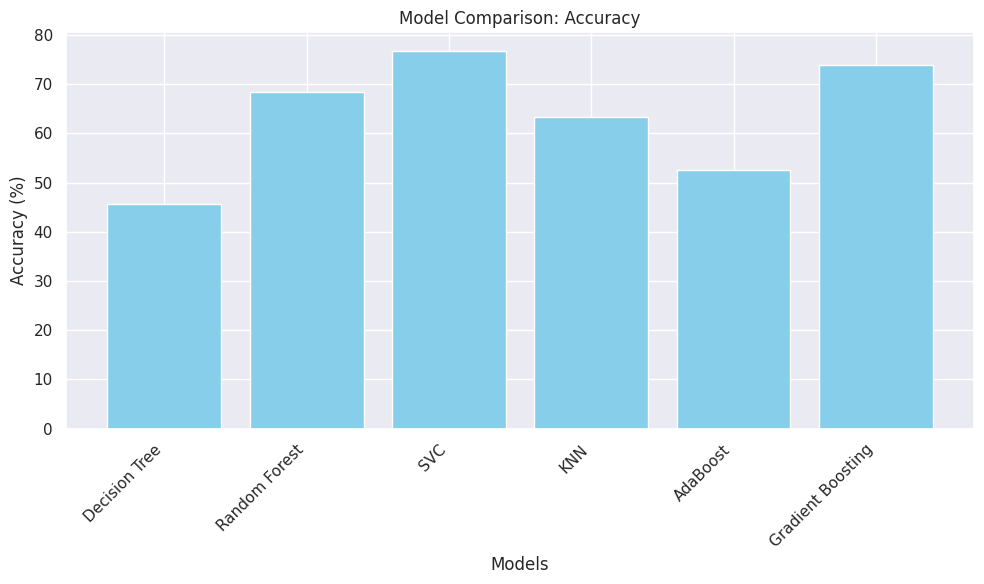

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.data
y = lfw_people.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

accuracies = []

for model_name, model in models.items():
    model.fit(Xtrain_scaled, ytrain)
    y_pred = model.predict(Xtest_scaled)
    acc = accuracy_score(ytest, y_pred) * 100
    accuracies.append(acc)

plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies, color='skyblue')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison: Accuracy')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


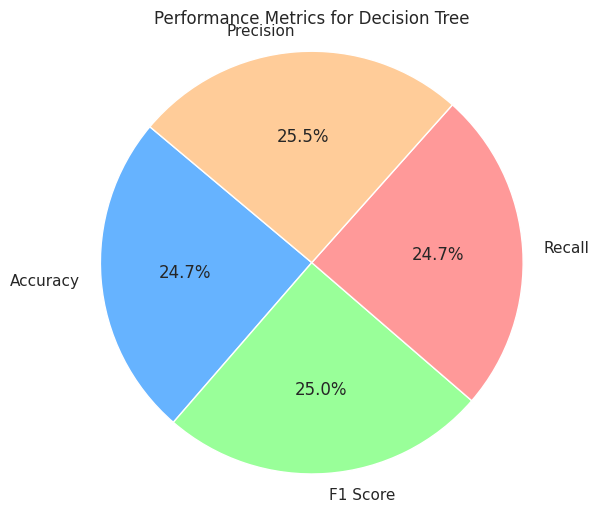

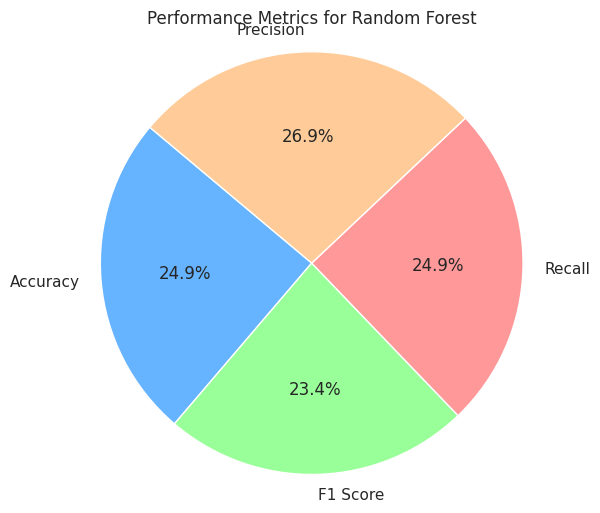

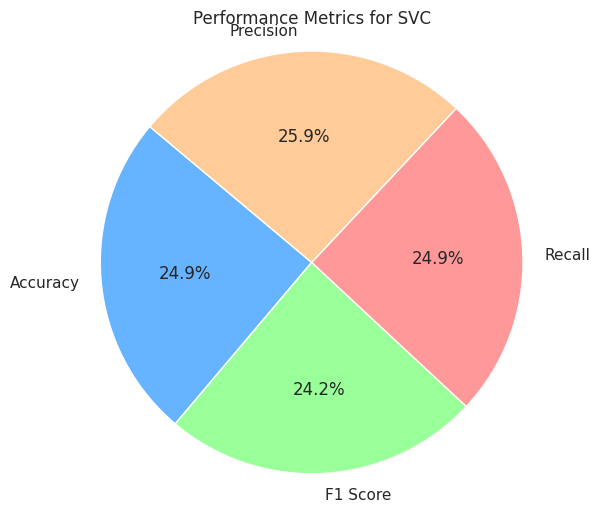

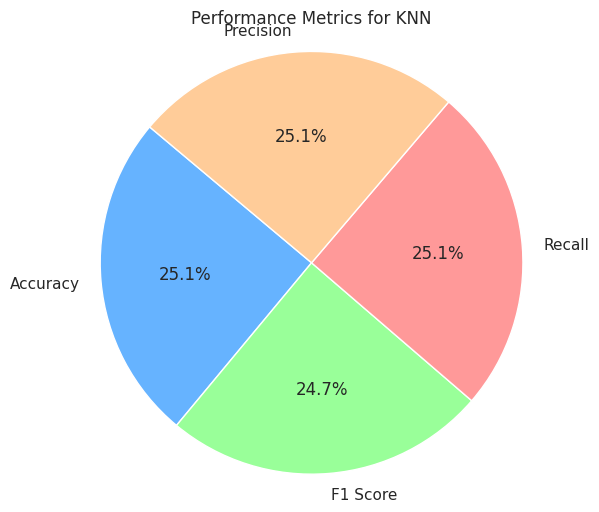

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


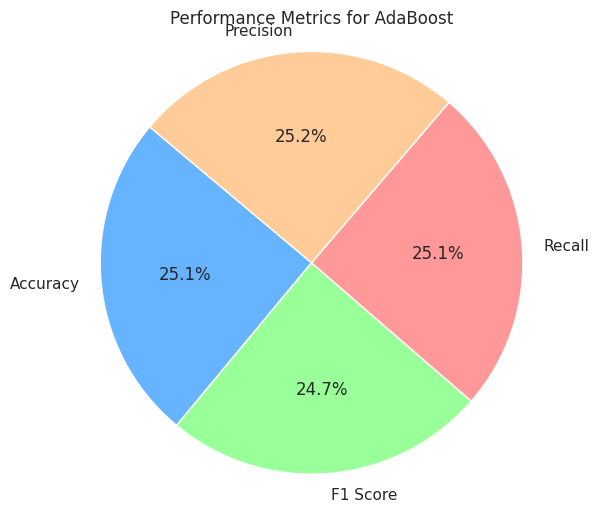

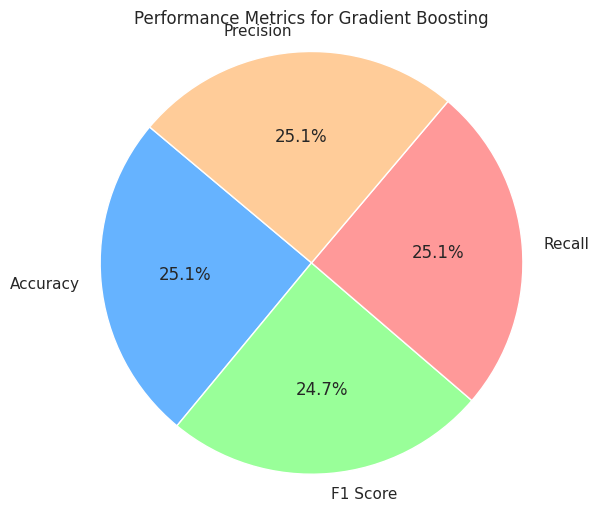

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.data
y = lfw_people.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for model_name, model in models.items():
    model.fit(Xtrain_scaled, ytrain)
    y_pred = model.predict(Xtest_scaled)

    accuracy = accuracy_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred, average='weighted')
    recall = recall_score(ytest, y_pred, average='weighted')
    precision = precision_score(ytest, y_pred, average='weighted')

    metrics = [accuracy, f1, recall, precision]
    metric_labels = ['Accuracy', 'F1 Score', 'Recall', 'Precision']

    plt.figure(figsize=(6, 6))
    plt.pie(metrics, labels=metric_labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ff9999', '#ffcc99'])
    plt.title(f'Performance Metrics for {model_name}')
    plt.axis('equal')
    plt.show()
